# BUSINESS ANALYSIS

##### This analysis is an advance step of sales analysis. It will provide some insights from perspective business.

In [329]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [330]:
data = pd.read_csv(r"G:\DATA ANALYTICS STUFF\Transaction Superstore.csv", encoding='windows-1254')

# DATA CLEANING 

Take a look at data informations

In [331]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [332]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,08-11-16,11-11-16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,08-11-16,11-11-16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,12-06-16,16-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,11-10-15,18-10-15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,11-10-15,18-10-15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


#### Check if there is any duplicate in data

In [333]:
data.loc[data.duplicated()==True]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


In [334]:
data.drop_duplicates()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,08-11-16,11-11-16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,08-11-16,11-11-16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,12-06-16,16-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,11-10-15,18-10-15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,11-10-15,18-10-15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,21-01-14,23-01-14,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,26-02-17,03-03-17,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,26-02-17,03-03-17,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,26-02-17,03-03-17,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


No duplicate data found.

#### Check for null values

In [335]:
data.isnull().values.any()

False

No null values found.

#### Remove unwanted data, such as column Row ID.

In [336]:
del data['Row ID']

#### Adjust data format that is not apropriate, such as Order Date and Ship Date should be in datetime type, not object type.

In [337]:
data['Order Date'] = pd.to_datetime(data['Order Date'],format='%d-%m-%y')

In [338]:
data['Ship Date'] = pd.to_datetime(data['Ship Date'],format='%d-%m-%y')

In [339]:
data['Year'] = data['Order Date'].dt.year

In [340]:
data['Month'] = data['Order Date'].dt.month

In [341]:
data.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,Month
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10


## ANALYSIS BY CUSTOMER

#### Give label for loyal customers who always transacting every year.

In [342]:
yearly = data[['Customer Name','Year']].drop_duplicates().copy()

In [343]:
_2014 = yearly[yearly['Year']==2014]
_2015 = yearly[yearly['Year']==2015]
_2016 = yearly[yearly['Year']==2016]
_2017 = yearly[yearly['Year']==2017]

In [344]:
_14_15 = pd.merge(_2014,_2015,on='Customer Name',how='inner')
_16_17 = pd.merge(_2016,_2017,on='Customer Name',how='inner') 
loyal_customer = pd.merge(_14_15,_16_17,on='Customer Name',how='inner')
loyal_customer['Segment'] = data['Segment'].copy()
loyal_customer

,Customer Name,Year_x_x,Year_y_x,Year_x_y,Year_y_y,Segment
0,Brosina Hoffman,2014,2015,2016,2017,Consumer
1,Alejandro Grove,2014,2015,2016,2017,Consumer
2,Brendan Sweed,2014,2015,2016,2017,Corporate
3,Joel Eaton,2014,2015,2016,2017,Consumer
4,Philip Fox,2014,2015,2016,2017,Consumer
...,...,...,...,...,...,...
301,George Ashbrook,2014,2015,2016,2017,Corporate
302,Richard Eichhorn,2014,2015,2016,2017,Corporate
303,Roy Phan,2014,2015,2016,2017,Consumer
304,Jamie Kunitz,2014,2015,2016,2017,Corporate


In [345]:
loyal_customer_list = loyal_customer['Customer Name'].to_list()

#### Customer Growth Year by Year

In [346]:
_1415 = pd.merge(_2014,_2015,on='Customer Name',how='outer')
_1617 = pd.merge(_2016,_2017,on='Customer Name',how='outer') 
customer_all = pd.merge(_1415,_1617,on='Customer Name',how='outer')
customer_all

,Customer Name,Year_x_x,Year_y_x,Year_x_y,Year_y_y
0,Brosina Hoffman,2014.0,2015.0,2016.0,2017.0
1,Pete Kriz,2014.0,NaN,2016.0,2017.0
2,Alejandro Grove,2014.0,2015.0,2016.0,2017.0
3,Zuschuss Donatelli,2014.0,NaN,2016.0,2017.0
4,Patrick O'Donnell,2014.0,NaN,2016.0,2017.0
...,...,...,...,...,...
788,Michelle Lonsdale,NaN,NaN,NaN,2017.0
789,Roland Murray,NaN,NaN,NaN,2017.0
790,Tony Molinari,NaN,NaN,NaN,2017.0
791,Mitch Gastineau,NaN,NaN,NaN,2017.0


In [347]:
_14_only = _2014.copy()
_14_only

,Customer Name,Year
5,Brosina Hoffman,2014
16,Pete Kriz,2014
17,Alejandro Grove,2014
18,Zuschuss Donatelli,2014
46,Patrick O'Donnell,2014
...,...,...
9832,George Ashbrook,2014
9843,Richard Eichhorn,2014
9911,Roy Phan,2014
9933,Jamie Kunitz,2014


In [348]:
_15_only = customer_all.loc[(customer_all['Year_x_y'].isnull()) & (customer_all['Year_y_y'].isnull()) & (customer_all['Year_x_x'].isnull())]
_15_only

,Customer Name,Year_x_x,Year_y_x,Year_x_y,Year_y_y
607,Joel Jenkins,NaN,2015.0,NaN,NaN


In [349]:
_16_only = customer_all.loc[(customer_all['Year_x_x'].isnull()) & (customer_all['Year_y_y'].isnull()) & (customer_all['Year_y_x'].isnull())]
_16_only

,Customer Name,Year_x_x,Year_y_x,Year_x_y,Year_y_y
754,Chris McAfee,NaN,NaN,2016.0,NaN
772,Anthony O'Donnell,NaN,NaN,2016.0,NaN
774,Lela Donovan,NaN,NaN,2016.0,NaN
775,Anemone Ratner,NaN,NaN,2016.0,NaN
778,Carl Jackson,NaN,NaN,2016.0,NaN
780,Susan MacKendrick,NaN,NaN,2016.0,NaN


In [350]:
_17_only = customer_all.loc[(customer_all['Year_x_y'].isnull()) & (customer_all['Year_y_x'].isnull()) & (customer_all['Year_x_x'].isnull())]
_17_only

,Customer Name,Year_x_x,Year_y_x,Year_x_y,Year_y_y
782,Clay Cheatham,NaN,NaN,NaN,2017.0
783,Patricia Hirasaki,NaN,NaN,NaN,2017.0
784,Jocasta Rupert,NaN,NaN,NaN,2017.0
785,Chuck Sachs,NaN,NaN,NaN,2017.0
786,Jenna Caffey,NaN,NaN,NaN,2017.0
787,Christina DeMoss,NaN,NaN,NaN,2017.0
788,Michelle Lonsdale,NaN,NaN,NaN,2017.0
789,Roland Murray,NaN,NaN,NaN,2017.0
790,Tony Molinari,NaN,NaN,NaN,2017.0
791,Mitch Gastineau,NaN,NaN,NaN,2017.0


I see that at least one new customer transacting in the superstore and climb up every year. And there are 11 new customers in 2017.

#### Classify customers based on the amount of money they spent.

In [351]:
classify_df = pd.DataFrame(data.groupby('Customer Name')['Sales'].sum()).reset_index()
classify_df

,Customer Name,Sales
0,Aaron Bergman,886.156
1,Aaron Hawkins,1744.700
2,Aaron Smayling,3050.692
3,Adam Bellavance,7755.620
4,Adam Hart,3250.337
...,...,...
788,Xylona Preis,2374.658
789,Yana Sorensen,6720.444
790,Yoseph Carroll,5454.350
791,Zuschuss Carroll,8025.707


Medium customer is customer who spend money less than or equal average value.
Big customer is customer who spend money more than average value.

In [352]:
Q2 = classify_df['Sales'].mean()

In [353]:
Class = []
for i in classify_df['Sales']:
    if i <= Q2:
        Class.append('Medium')
    else:
        Class.append('Big')        

In [354]:
classify_df['Class'] = Class

In [355]:
classify_df1 = pd.DataFrame(classify_df.groupby('Class')['Class'].count()).rename(columns={'Class':'Count'}).reset_index()

In [356]:
classify_df

,Customer Name,Sales,Class
0,Aaron Bergman,886.156,Medium
1,Aaron Hawkins,1744.700,Medium
2,Aaron Smayling,3050.692,Big
3,Adam Bellavance,7755.620,Big
4,Adam Hart,3250.337,Big
...,...,...,...
788,Xylona Preis,2374.658,Medium
789,Yana Sorensen,6720.444,Big
790,Yoseph Carroll,5454.350,Big
791,Zuschuss Carroll,8025.707,Big


In [357]:
customer_df = pd.merge(classify_df,loyal_customer,on='Customer Name',how='left')
customer_df

,Customer Name,Sales,Class,Year_x_x,Year_y_x,Year_x_y,Year_y_y,Segment
0,Aaron Bergman,886.156,Medium,NaN,NaN,NaN,NaN,NaN
1,Aaron Hawkins,1744.700,Medium,2014.0,2015.0,2016.0,2017.0,Corporate
2,Aaron Smayling,3050.692,Big,NaN,NaN,NaN,NaN,NaN
3,Adam Bellavance,7755.620,Big,NaN,NaN,NaN,NaN,NaN
4,Adam Hart,3250.337,Big,2014.0,2015.0,2016.0,2017.0,Home Office
...,...,...,...,...,...,...,...,...
788,Xylona Preis,2374.658,Medium,2014.0,2015.0,2016.0,2017.0,Consumer
789,Yana Sorensen,6720.444,Big,NaN,NaN,NaN,NaN,NaN
790,Yoseph Carroll,5454.350,Big,2014.0,2015.0,2016.0,2017.0,Consumer
791,Zuschuss Carroll,8025.707,Big,2014.0,2015.0,2016.0,2017.0,Home Office


In [358]:
customer_df = customer_df.fillna(0)

In [359]:
Loyal = []
for i in customer_df['Segment']:
    if i != 0:
        Loyal.append('Yes')
    else:
        Loyal.append('No')

In [360]:
customer_df['Loyal'] = Loyal

In [361]:
del customer_df['Year_x_x']
del customer_df['Year_y_x']
del customer_df['Year_x_y']
del customer_df['Year_y_y']
del customer_df['Segment']

In [362]:
customer_df

,Customer Name,Sales,Class,Loyal
0,Aaron Bergman,886.156,Medium,No
1,Aaron Hawkins,1744.700,Medium,Yes
2,Aaron Smayling,3050.692,Big,No
3,Adam Bellavance,7755.620,Big,No
4,Adam Hart,3250.337,Big,Yes
...,...,...,...,...
788,Xylona Preis,2374.658,Medium,Yes
789,Yana Sorensen,6720.444,Big,No
790,Yoseph Carroll,5454.350,Big,Yes
791,Zuschuss Carroll,8025.707,Big,Yes


In [363]:
cust = data.groupby('Customer Name').agg({'Order ID':'count',
                                                          'Quantity':'sum',
                                                          'Profit':'sum'}).rename(columns={'Order ID':'Frequency'}).reset_index()
cust

,Customer Name,Frequency,Quantity,Profit
0,Aaron Bergman,6,13,129.3465
1,Aaron Hawkins,11,54,365.2152
2,Aaron Smayling,10,48,-253.5746
3,Adam Bellavance,18,56,2054.5885
4,Adam Hart,20,75,281.1890
...,...,...,...,...
788,Xylona Preis,28,100,621.2300
789,Yana Sorensen,12,58,1778.2923
790,Yoseph Carroll,8,31,1305.6290
791,Zuschuss Carroll,31,105,-1032.1490


In [364]:
customer_data = pd.merge(customer_df,cust,on='Customer Name',how='inner')
customer_data

,Customer Name,Sales,Class,Loyal,Frequency,Quantity,Profit
0,Aaron Bergman,886.156,Medium,No,6,13,129.3465
1,Aaron Hawkins,1744.700,Medium,Yes,11,54,365.2152
2,Aaron Smayling,3050.692,Big,No,10,48,-253.5746
3,Adam Bellavance,7755.620,Big,No,18,56,2054.5885
4,Adam Hart,3250.337,Big,Yes,20,75,281.1890
...,...,...,...,...,...,...,...
788,Xylona Preis,2374.658,Medium,Yes,28,100,621.2300
789,Yana Sorensen,6720.444,Big,No,12,58,1778.2923
790,Yoseph Carroll,5454.350,Big,Yes,8,31,1305.6290
791,Zuschuss Carroll,8025.707,Big,Yes,31,105,-1032.1490


#### Group customers by their cumulative profit of transaction. Make new column 'Profitable'. 

Profitable is Yes if cumulative profit more than zero. And No if cumulative profit less than zero.

In [365]:
Profitable = []
for i in customer_data['Profit']:
    if i > 0:
        Profitable.append('Yes')
    else:
        Profitable.append('No')

In [366]:
customer_data['Profitable'] = Profitable
customer_data

,Customer Name,Sales,Class,Loyal,Frequency,Quantity,Profit,Profitable
0,Aaron Bergman,886.156,Medium,No,6,13,129.3465,Yes
1,Aaron Hawkins,1744.700,Medium,Yes,11,54,365.2152,Yes
2,Aaron Smayling,3050.692,Big,No,10,48,-253.5746,No
3,Adam Bellavance,7755.620,Big,No,18,56,2054.5885,Yes
4,Adam Hart,3250.337,Big,Yes,20,75,281.1890,Yes
...,...,...,...,...,...,...,...,...
788,Xylona Preis,2374.658,Medium,Yes,28,100,621.2300,Yes
789,Yana Sorensen,6720.444,Big,No,12,58,1778.2923,Yes
790,Yoseph Carroll,5454.350,Big,Yes,8,31,1305.6290,Yes
791,Zuschuss Carroll,8025.707,Big,Yes,31,105,-1032.1490,No


#### Put all customer data into one dataframe and for the last classification, I will group them into several classification.

In [367]:
Sym_Class = []
for i in customer_data['Class']:
    if i == 'Medium':
        Sym_Class.append('M')
    else:
        Sym_Class.append('B')
        
Sym_Loyal = []
for i in customer_data['Loyal']:
    if i == 'Yes':
        Sym_Loyal.append('Y')
    else:
        Sym_Loyal.append('N')
        
Sym_Profitable = []
for i in customer_data['Profitable']:
    if i =='Yes':
        Sym_Profitable.append('Y')
    else:
        Sym_Profitable.append('N')

In [368]:
customer_data['Sym_Class'] = Sym_Class
customer_data['Sym_Loyal'] = Sym_Loyal
customer_data['Sym_Profitable'] = Sym_Profitable

In [369]:
customer_data

,Customer Name,Sales,Class,Loyal,Frequency,Quantity,Profit,Profitable,Sym_Class,Sym_Loyal,Sym_Profitable
0,Aaron Bergman,886.156,Medium,No,6,13,129.3465,Yes,M,N,Y
1,Aaron Hawkins,1744.700,Medium,Yes,11,54,365.2152,Yes,M,Y,Y
2,Aaron Smayling,3050.692,Big,No,10,48,-253.5746,No,B,N,N
3,Adam Bellavance,7755.620,Big,No,18,56,2054.5885,Yes,B,N,Y
4,Adam Hart,3250.337,Big,Yes,20,75,281.1890,Yes,B,Y,Y
...,...,...,...,...,...,...,...,...,...,...,...
788,Xylona Preis,2374.658,Medium,Yes,28,100,621.2300,Yes,M,Y,Y
789,Yana Sorensen,6720.444,Big,No,12,58,1778.2923,Yes,B,N,Y
790,Yoseph Carroll,5454.350,Big,Yes,8,31,1305.6290,Yes,B,Y,Y
791,Zuschuss Carroll,8025.707,Big,Yes,31,105,-1032.1490,No,B,Y,N


In [370]:
import numpy as np

In [371]:
np_class = np.array(customer_data['Sym_Class'])
np_loyal = np.array(customer_data['Sym_Loyal'])
np_profit = np.array(customer_data['Sym_Profitable'])
Labelling = list(np_class+np_loyal+np_profit)
customer_data['Labelling'] = Labelling

In [372]:
Classification = []
for i in customer_data['Labelling']:
    if i == 'BNN' or i == 'MNN' or i == 'MYN':
        Classification.append('Black')
    elif i == 'BYN':
        Classification.append('Bronze')   
    elif i == 'MNY':
        Classification.append('Silver')
    elif i == 'MYY' or i == 'BNY':
        Classification.append('Gold')
    elif i == 'BYY':
        Classification.append('Platinum')

customer_data['Classification'] = Classification

In [373]:
customer_data['Class'].value_counts()

Medium    499
Big       294
Name: Class, dtype: int64

#### Visualize all customer data information

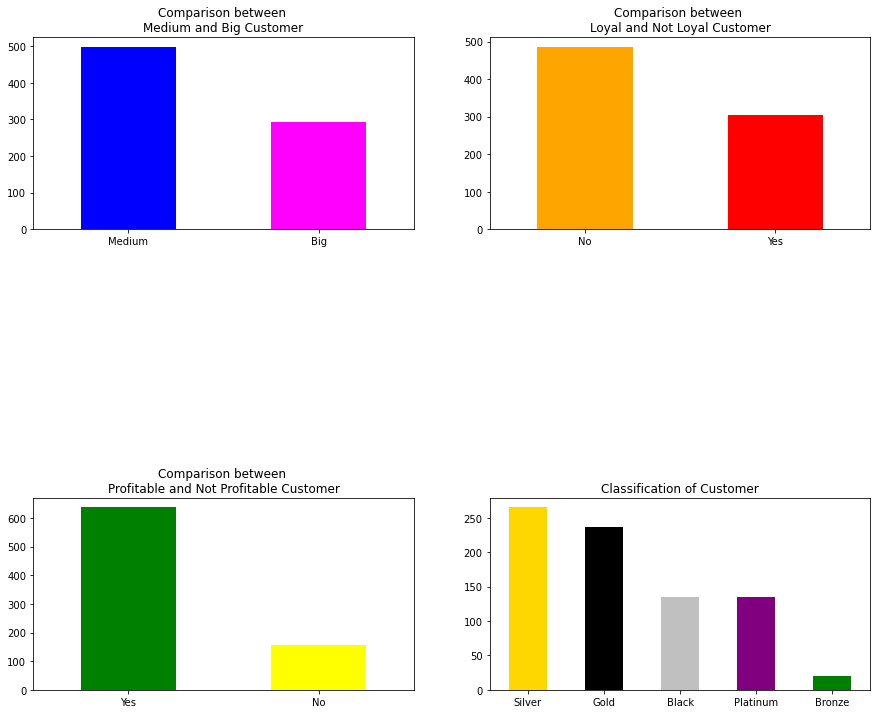

In [374]:
plt.figure(figsize=(15,12))
plt.subplot(3,2,1)
customer_data['Class'].value_counts().plot(kind='bar',color=['blue','magenta'])
plt.title('Comparison between \nMedium and Big Customer',fontsize=12)
plt.xticks(rotation=0)

plt.subplot(3,2,2)
customer_data['Loyal'].value_counts().plot(kind='bar',color=['orange','red'])
plt.title('Comparison between \nLoyal and Not Loyal Customer',fontsize=12)
plt.xticks(rotation=0)

plt.subplot(3,2,5)
customer_data['Profitable'].value_counts().plot(kind='bar',color=['green','yellow'])
plt.title('Comparison between \nProfitable and Not Profitable Customer',fontsize=12)
plt.xticks(rotation=0)

plt.subplot(3,2,6)
customer_data['Classification'].value_counts().plot(kind='bar',color=['gold','black','silver','purple','green'])
plt.title('Classification of Customer',fontsize=12,loc='center')
plt.xticks(rotation=0)
plt.show()

#### Using Machine Learning to Segmenting Customer with Clustering

In [375]:
customer_df = customer_data[['Customer Name','Loyal','Profitable','Frequency','Sales','Quantity']].copy()
customer_df

,Customer Name,Loyal,Profitable,Frequency,Sales,Quantity
0,Aaron Bergman,No,Yes,6,886.156,13
1,Aaron Hawkins,Yes,Yes,11,1744.700,54
2,Aaron Smayling,No,No,10,3050.692,48
3,Adam Bellavance,No,Yes,18,7755.620,56
4,Adam Hart,Yes,Yes,20,3250.337,75
...,...,...,...,...,...,...
788,Xylona Preis,Yes,Yes,28,2374.658,100
789,Yana Sorensen,No,Yes,12,6720.444,58
790,Yoseph Carroll,Yes,Yes,8,5454.350,31
791,Zuschuss Carroll,Yes,No,31,8025.707,105


Pre-process data

In [376]:
def data_preprocess(data):
    # Convert categorical column
    categorical_column = ['Loyal','Profitable']
    df_categorical = customer_df[categorical_column].copy()
    df_categorical['Loyal'] = df_categorical['Loyal'].map({'Yes':1,'No':0})
    df_categorical['Profitable'] = df_categorical['Profitable'].map({'Yes':1,'No':0})
    
    #Standardize numerical column
    numerical_column = ['Frequency','Sales','Quantity']
    df_numerical = customer_df[numerical_column].copy()
    # Frequency column
    df_numerical['Frequency'] = (df_numerical['Frequency']-(df_numerical['Frequency'].mean()))/(df_numerical['Frequency'].std())
    # Sales column
    df_numerical['Sales'] = (df_numerical['Sales']-(df_numerical['Sales'].mean()))/(df_numerical['Sales'].std())
    # Quantity column
    df_numerical['Quantity'] = (df_numerical['Quantity']-(df_numerical['Quantity'].mean()))/(df_numerical['Quantity'].std())
   
    # Merge all dataset
    df_final = df_categorical.merge(df_numerical,left_index=True,right_index=True,how='left')
    
    return df_final

In [377]:
new_df = data_preprocess(customer_df)
new_df

,Loyal,Profitable,Frequency,Sales,Quantity
0,0,1,-1.057703,-0.764909,-1.399157
1,1,1,-0.256750,-0.438301,0.251213
2,0,0,-0.416940,0.058525,0.009695
3,0,1,0.864586,1.848376,0.331719
4,1,1,1.184967,0.134474,1.096524
...,...,...,...,...,...
788,1,1,2.466493,-0.198652,2.102847
789,0,1,-0.096559,1.454574,0.412224
790,1,1,-0.737322,0.972926,-0.674604
791,1,0,2.947065,1.951123,2.304112


In [378]:
from kmodes.kprototypes import KPrototypes

In [379]:
kproto = KPrototypes(n_clusters=5,random_state=75)

In [380]:
clusters = kproto.fit_predict(new_df, categorical=[0,4])

In [381]:
cust_final = customer_df.copy()

In [382]:
cust_final['Cluster'] = clusters

In [383]:
cust_final['Segmen'] = cust_final['Cluster'].map({0:'Platinum',
                                                  1:'Gold',
                                                  2:'Silver',
                                                  3:'Bronze',
                                                  4:'Black'})
cust_final['Customer ID'] = data['Customer ID']
cust_final

,Customer Name,Loyal,Profitable,Frequency,Sales,Quantity,Cluster,Segmen,Customer ID
0,Aaron Bergman,No,Yes,6,886.156,13,2,Silver,CG-12520
1,Aaron Hawkins,Yes,Yes,11,1744.700,54,1,Gold,CG-12520
2,Aaron Smayling,No,No,10,3050.692,48,2,Silver,DV-13045
3,Adam Bellavance,No,Yes,18,7755.620,56,3,Bronze,SO-20335
4,Adam Hart,Yes,Yes,20,3250.337,75,0,Platinum,SO-20335
...,...,...,...,...,...,...,...,...,...
788,Xylona Preis,Yes,Yes,28,2374.658,100,0,Platinum,SA-20830
789,Yana Sorensen,No,Yes,12,6720.444,58,3,Bronze,SA-20830
790,Yoseph Carroll,Yes,Yes,8,5454.350,31,3,Bronze,SA-20830
791,Zuschuss Carroll,Yes,No,31,8025.707,105,0,Platinum,SA-20830


In [384]:
for i in range(0,5):
    print('\nData Pelanggan Cluster :{}\n'.format(i))
    print(cust_final[cust_final['Cluster']==i])


Data Pelanggan Cluster :0

          Customer Name Loyal Profitable  Frequency     Sales  Quantity  \
4             Adam Hart   Yes        Yes         20  3250.337        75   
5    Adam Shillingsburg   Yes        Yes         25  3255.310        81   
42        Anna Andreadi   Yes        Yes         18  5086.935        64   
45        Anna Häberlin    No        Yes         23  7888.294       102   
46       Anne McFarland   Yes        Yes         22  5664.022        81   
..                  ...   ...        ...        ...       ...       ...   
765     Tracy Blumstein   Yes         No         20  4737.486        85   
782     Victoria Wilson   Yes         No         18  6134.038        77   
787       William Brown   Yes        Yes         37  6160.102       146   
788        Xylona Preis   Yes        Yes         28  2374.658       100   
791    Zuschuss Carroll   Yes         No         31  8025.707       105   

     Cluster    Segmen Customer ID  
4          0  Platinum    SO-20335

I will compare clustering by manual and by machine learning

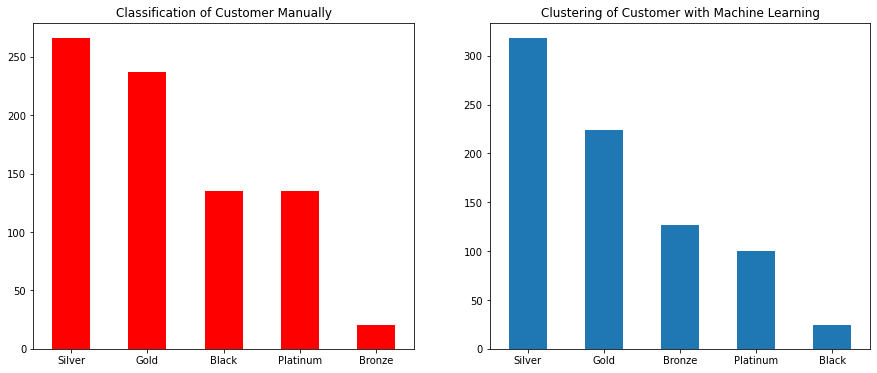

In [385]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
customer_data['Classification'].value_counts().plot(kind='bar',color='red')
plt.title('Classification of Customer Manually',fontsize=12,loc='center')
plt.xticks(rotation=0)

plt.subplot(1,2,2)
cust_final['Segmen'].value_counts().plot(kind='bar')
plt.title('Clustering of Customer with Machine Learning',fontsize=12,loc='center')
plt.xticks(rotation=0)

plt.show()

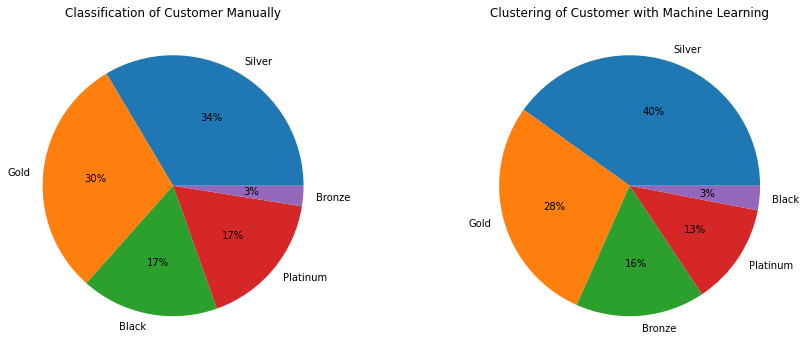

In [386]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.pie(customer_data['Classification'].value_counts(),labels=customer_data['Classification'].unique(),autopct='%.0f%%')
plt.title('Classification of Customer Manually',fontsize=12,loc='center')
plt.xticks(rotation=0)

plt.subplot(1,2,2)
plt.pie(cust_final['Segmen'].value_counts(),labels=cust_final['Segmen'].unique(),autopct='%.0f%%')
plt.title('Clustering of Customer with Machine Learning',fontsize=12,loc='center')
plt.xticks(rotation=0)

plt.show()

Overall there is no significant different between these two method, except for black and bronze segment which are mirrored.

The difference between these method is complexity. Manual method quite more simple because I label customer based on specific criteria first, then classify it. Whereas for ML method I depend all clustering thing based on raw data and algorithma will recognize the pattern and cluster it based on their closeness. 

## ANALYSIS BY PRODUCT

In [387]:
product_data = data[['Order ID','Product ID','Category','Sub-Category','Product Name','Quantity','Sales','Profit','Discount']].copy()
product_data

,Order ID,Product ID,Category,Sub-Category,Product Name,Quantity,Sales,Profit,Discount
0,CA-2016-152156,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,2,261.9600,41.9136,0.00
1,CA-2016-152156,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",3,731.9400,219.5820,0.00
2,CA-2016-138688,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,2,14.6200,6.8714,0.00
3,US-2015-108966,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,5,957.5775,-383.0310,0.45
4,US-2015-108966,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,2,22.3680,2.5164,0.20
...,...,...,...,...,...,...,...,...,...
9989,CA-2014-110422,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,3,25.2480,4.1028,0.20
9990,CA-2017-121258,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,2,91.9600,15.6332,0.00
9991,CA-2017-121258,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,2,258.5760,19.3932,0.20
9992,CA-2017-121258,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",4,29.6000,13.3200,0.00


#### Checking of Why There are Several Transactions Have Negative Profit

In [388]:
negative_profit = product_data.loc[product_data['Profit']<0]
negative_profit

,Order ID,Product ID,Category,Sub-Category,Product Name,Quantity,Sales,Profit,Discount
3,US-2015-108966,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,5,957.5775,-383.0310,0.45
14,US-2015-118983,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,5,68.8100,-123.8580,0.80
15,US-2015-118983,OFF-BI-10000756,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,3,2.5440,-3.8160,0.80
23,US-2017-156909,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",2,71.3720,-1.0196,0.30
27,US-2015-150630,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",7,3083.4300,-1665.0522,0.50
...,...,...,...,...,...,...,...,...,...
9920,CA-2016-149272,OFF-BI-10004233,Office Supplies,Binders,"GBC Pre-Punched Binding Paper, Plastic, White,...",7,22.3860,-35.8176,0.80
9921,CA-2014-111360,OFF-BI-10003350,Office Supplies,Binders,Acco Expandable Hanging Binders,3,5.7420,-4.5936,0.70
9931,CA-2015-104948,FUR-BO-10004357,Furniture,Bookcases,O'Sullivan Living Dimensions 3-Shelf Bookcases,4,683.3320,-40.1960,0.15
9937,CA-2016-164889,FUR-TA-10001676,Furniture,Tables,Hon 61000 Series Interactive Training Tables,2,71.0880,-1.7772,0.20


In [389]:
product_data.loc[product_data['Discount']>0.0]

,Order ID,Product ID,Category,Sub-Category,Product Name,Quantity,Sales,Profit,Discount
3,US-2015-108966,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,5,957.5775,-383.0310,0.45
4,US-2015-108966,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,2,22.3680,2.5164,0.20
7,CA-2014-115812,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,6,907.1520,90.7152,0.20
8,CA-2014-115812,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,3,18.5040,5.7825,0.20
10,CA-2014-115812,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,9,1706.1840,85.3092,0.20
...,...,...,...,...,...,...,...,...,...
9978,US-2016-103674,OFF-BI-10003727,Office Supplies,Binders,Avery Durable Slant Ring Binders With Label Ho...,4,13.3760,4.6816,0.20
9979,US-2016-103674,OFF-BI-10002026,Office Supplies,Binders,Ibico Recycled Linen-Style Covers,14,437.4720,153.1152,0.20
9981,CA-2017-163566,OFF-LA-10004484,Office Supplies,Labels,Avery 476,5,16.5200,5.3690,0.20
9989,CA-2014-110422,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,3,25.2480,4.1028,0.20


I found that the transaction which resulted negative profit also give discount, so I assume that the gap may caused by the given disount. But not all of discount product resulted negative profit.

#### Find the Purchasing Price before Product been Sold

In [390]:
product_data['Purchase'] = product_data['Sales'] - product_data['Profit']
product_data

,Order ID,Product ID,Category,Sub-Category,Product Name,Quantity,Sales,Profit,Discount,Purchase
0,CA-2016-152156,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,2,261.9600,41.9136,0.00,220.0464
1,CA-2016-152156,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",3,731.9400,219.5820,0.00,512.3580
2,CA-2016-138688,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,2,14.6200,6.8714,0.00,7.7486
3,US-2015-108966,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,5,957.5775,-383.0310,0.45,1340.6085
4,US-2015-108966,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,2,22.3680,2.5164,0.20,19.8516
...,...,...,...,...,...,...,...,...,...,...
9989,CA-2014-110422,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,3,25.2480,4.1028,0.20,21.1452
9990,CA-2017-121258,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,2,91.9600,15.6332,0.00,76.3268
9991,CA-2017-121258,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,2,258.5760,19.3932,0.20,239.1828
9992,CA-2017-121258,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",4,29.6000,13.3200,0.00,16.2800


#### Find the Unit Price Product 

In [391]:
product_data['Unit Price'] = product_data['Sales']/(product_data['Quantity']*(1-product_data['Discount']))
product_data

,Order ID,Product ID,Category,Sub-Category,Product Name,Quantity,Sales,Profit,Discount,Purchase,Unit Price
0,CA-2016-152156,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,2,261.9600,41.9136,0.00,220.0464,130.98
1,CA-2016-152156,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",3,731.9400,219.5820,0.00,512.3580,243.98
2,CA-2016-138688,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,2,14.6200,6.8714,0.00,7.7486,7.31
3,US-2015-108966,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,5,957.5775,-383.0310,0.45,1340.6085,348.21
4,US-2015-108966,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,2,22.3680,2.5164,0.20,19.8516,13.98
...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2014-110422,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,3,25.2480,4.1028,0.20,21.1452,10.52
9990,CA-2017-121258,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,2,91.9600,15.6332,0.00,76.3268,45.98
9991,CA-2017-121258,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,2,258.5760,19.3932,0.20,239.1828,161.61
9992,CA-2017-121258,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",4,29.6000,13.3200,0.00,16.2800,7.40


In [392]:
price_list = product_data[['Product Name','Sub-Category','Category','Unit Price']].copy().sort_values(by='Unit Price')                                                                                      

In [393]:
price_list = price_list.drop_duplicates(subset='Product Name')

In [394]:
price_list

,Product Name,Sub-Category,Category,Unit Price
9163,Maxell 4.7GB DVD+R 5/Pack,Accessories,Technology,0.99
3709,Maxell 4.7GB DVD-R 5/Pack,Accessories,Technology,0.99
7296,OIC Thumb-Tacks,Fasteners,Office Supplies,1.14
3769,"OIC Binder Clips, Mini, 1/4"" Capacity, Black",Fasteners,Office Supplies,1.24
5091,Bagged Rubber Bands,Fasteners,Office Supplies,1.26
...,...,...,...,...
318,Canon imageCLASS MF7460 Monochrome Digital Las...,Machines,Technology,1995.99
3151,Cubify CubeX 3D Printer Double Head Print,Machines,Technology,2999.99
8153,Canon imageCLASS 2200 Advanced Copier,Copiers,Technology,3499.99
683,Cubify CubeX 3D Printer Triple Head Print,Machines,Technology,3999.99


#### Classify Product by its Unit Price

Product with unit price less than 100 will be named Cheap Product

Product with unit price in range 100 to 750 will be named Medium Product

Product with unit price more than 750 will be named Expensive Product

In [395]:
Product_Class = []
for item in price_list['Unit Price']:
    if item < 100:
        Product_Class.append('Cheap')
    elif item > 100 and item < 750:
        Product_Class.append('Medium')
    else:
        Product_Class.append('Expensive')

In [396]:
price_list['Class'] = Product_Class

In [397]:
price_list

,Product Name,Sub-Category,Category,Unit Price,Class
9163,Maxell 4.7GB DVD+R 5/Pack,Accessories,Technology,0.99,Cheap
3709,Maxell 4.7GB DVD-R 5/Pack,Accessories,Technology,0.99,Cheap
7296,OIC Thumb-Tacks,Fasteners,Office Supplies,1.14,Cheap
3769,"OIC Binder Clips, Mini, 1/4"" Capacity, Black",Fasteners,Office Supplies,1.24,Cheap
5091,Bagged Rubber Bands,Fasteners,Office Supplies,1.26,Cheap
...,...,...,...,...,...
318,Canon imageCLASS MF7460 Monochrome Digital Las...,Machines,Technology,1995.99,Expensive
3151,Cubify CubeX 3D Printer Double Head Print,Machines,Technology,2999.99,Expensive
8153,Canon imageCLASS 2200 Advanced Copier,Copiers,Technology,3499.99,Expensive
683,Cubify CubeX 3D Printer Triple Head Print,Machines,Technology,3999.99,Expensive


#### Find Highest Profitable Product in Every Region

In [398]:
region_profit = pd.DataFrame(data.groupby(['Region','Sub-Category'])['Profit'].sum()).reset_index()

In [399]:
central_profit = region_profit[region_profit['Region']=='Central'].copy().sort_values(by='Profit',ascending=False)
west_profit = region_profit[region_profit['Region']=='West'].copy().sort_values(by='Profit',ascending=False)
east_profit = region_profit[region_profit['Region']=='East'].copy().sort_values(by='Profit',ascending=False)
south_profit = region_profit[region_profit['Region']=='South'].copy().sort_values(by='Profit',ascending=False)

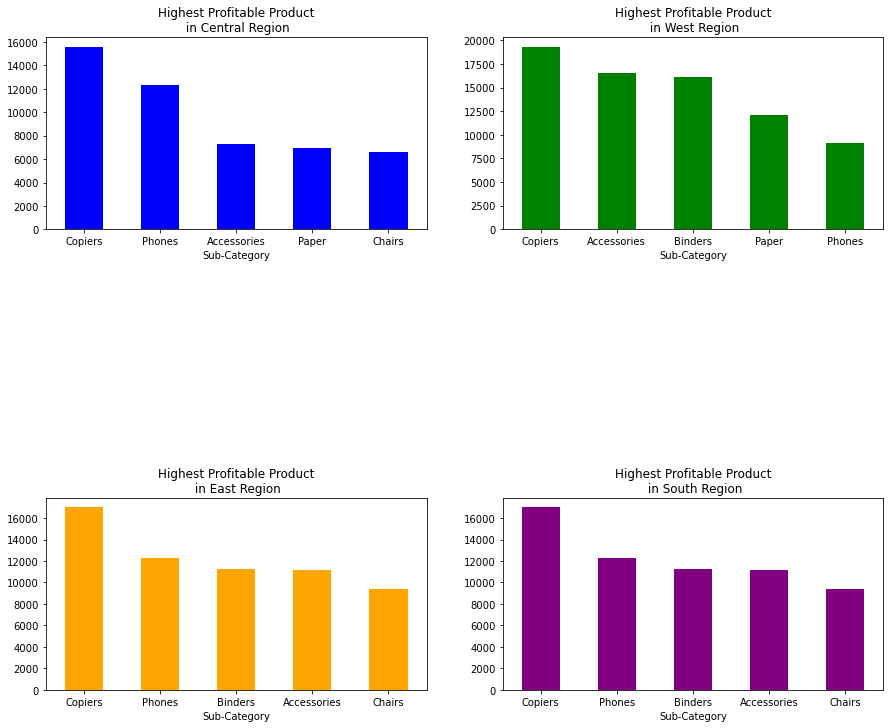

In [400]:
plt.figure(figsize=(15,12))
plt.subplot(3,2,1)
central_profit.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).head(5).plot(kind='bar',color=['blue'])
plt.title('Highest Profitable Product\n in Central Region',fontsize=12)
plt.xticks(rotation=0)

plt.subplot(3,2,2)
west_profit.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).head(5).plot(kind='bar',color=['green'])
plt.title('Highest Profitable Product\n in West Region',fontsize=12)
plt.xticks(rotation=0)

plt.subplot(3,2,5)
east_profit.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).head(5).plot(kind='bar',color=['orange'])
plt.title('Highest Profitable Product\n in East Region',fontsize=12)
plt.xticks(rotation=0)

plt.subplot(3,2,6)
east_profit.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).head(5).plot(kind='bar',color=['purple'])
plt.title('Highest Profitable Product\n in South Region',fontsize=12)
plt.xticks(rotation=0)
plt.show()

According to product sub-category, I find out that copiers is the highest profitable product across all regions. Besides that, I also find that phones and accesories sub-category are on the top 5 most profitable products as well.

#### Most Ordered Product

In [401]:
most_ordered = pd.DataFrame(product_data.groupby(['Product Name','Sub-Category'])['Quantity'].sum()).reset_index().sort_values(by='Quantity',ascending=False)
most_ordered = most_ordered.merge(price_list,how='left',on='Product Name')
most_ordered.sort_values('Quantity',ascending=False).head(10)

,Product Name,Sub-Category_x,Quantity,Sub-Category_y,Category,Unit Price,Class
0,Staples,Fasteners,215,Fasteners,Office Supplies,1.88,Cheap
1,Staple envelope,Envelopes,170,Envelopes,Office Supplies,5.58,Cheap
2,Easy-staple paper,Paper,150,Paper,Office Supplies,4.28,Cheap
3,Staples in misc. colors,Art,86,Art,Office Supplies,1.78,Cheap
4,KI Adjustable-Height Table,Tables,74,Tables,Furniture,85.98,Cheap
5,Avery Non-Stick Binders,Binders,71,Binders,Office Supplies,4.49,Cheap
6,Storex Dura Pro Binders,Binders,71,Binders,Office Supplies,5.94,Cheap
7,GBC Premium Transparent Covers with Diagonal L...,Binders,67,Binders,Office Supplies,20.98,Cheap
8,"Situations Contoured Folding Chairs, 4/Set",Chairs,64,Chairs,Furniture,70.98,Cheap
9,Staple-based wall hangings,Furnishings,62,Furnishings,Furniture,7.96,Cheap


#### Most Discount by Product Name and Sub-Category

In [402]:
dt = pd.DataFrame(product_data.groupby(['Category','Sub-Category','Product Name'])['Discount'].sum()).reset_index()

In [403]:
dt_product = dt.groupby('Sub-Category')

Bookcases

In [404]:
dt_product.get_group('Bookcases').sort_values('Discount',ascending=False).head(3)

,Category,Sub-Category,Product Name,Discount
25,Furniture,Bookcases,O'Sullivan 4-Shelf Bookcase in Odessa Pine,2.95
3,Furniture,Bookcases,"Atlantic Metals Mobile 5-Shelf Bookcases, Cust...",2.53
4,Furniture,Bookcases,Bestar Classic Bookcase,2.52


Chairs

In [405]:
dt_product.get_group('Chairs').sort_values('Discount',ascending=False).head(3)

,Category,Sub-Category,Product Name,Discount
88,Furniture,Chairs,"Global Wood Trimmed Manager's Task Chair, Khaki",3.2
137,Furniture,Chairs,"Situations Contoured Folding Chairs, 4/Set",2.7
70,Furniture,Chairs,"Global High-Back Leather Tilter, Burgundy",2.6


Furnishings

In [406]:
dt_product.get_group('Furnishings').sort_values('Discount',ascending=False).head(3)

,Category,Sub-Category,Product Name,Discount
299,Furniture,Furnishings,Staple-based wall hangings,3.8
245,Furniture,Furnishings,Flat Face Poster Frame,3.6
179,Furniture,Furnishings,Dana Swing-Arm Lamps,2.4


Tables

In [407]:
dt_product.get_group('Tables').sort_values('Discount',ascending=False).head(3)

,Category,Sub-Category,Product Name,Discount
369,Furniture,Tables,KI Adjustable-Height Table,4.25
355,Furniture,Tables,Chromcraft Round Conference Tables,3.35
344,Furniture,Tables,Bretford Rectangular Conference Table Tops,2.95


Appliances

In [408]:
dt_product.get_group('Appliances').sort_values('Discount',ascending=False).head(3)

,Category,Sub-Category,Product Name,Discount
381,Office Supplies,Appliances,3.6 Cubic Foot Counter Height Office Refrigerator,2.6
386,Office Supplies,Appliances,Acco 6 Outlet Guardian Premium Plus Surge Supp...,2.4
436,Office Supplies,Appliances,Fellowes Superior 10 Outlet Split Surge Protector,2.4


Art

In [409]:
dt_product.get_group('Art').sort_values('Discount',ascending=False).head(3)

,Category,Sub-Category,Product Name,Discount
555,Office Supplies,Art,Newell 312,1.8
482,Office Supplies,Art,Avery Fluorescent Highlighter Four-Color Set,1.4
525,Office Supplies,Art,Crayola Colored Pencils,1.2


Binders

In [410]:
dt_product.get_group('Binders').sort_values('Discount',ascending=False).head(3)

,Category,Sub-Category,Product Name,Discount
808,Office Supplies,Binders,Storex Dura Pro Binders,7.2
679,Office Supplies,Binders,Avery Non-Stick Binders,6.8
733,Office Supplies,Binders,GBC Instant Report Kit,6.4


Envelopes

In [411]:
dt_product.get_group('Envelopes').sort_values('Discount',ascending=False).head(3)

,Category,Sub-Category,Product Name,Discount
880,Office Supplies,Envelopes,Staple envelope,3.6
878,Office Supplies,Envelopes,"Redi-Strip #10 Envelopes, 4 1/8 x 9 1/2",0.8
857,Office Supplies,Envelopes,Cameo Buff Policy Envelopes,0.8


Fasteners

In [412]:
dt_product.get_group('Fasteners').sort_values('Discount',ascending=False).head(3)

,Category,Sub-Category,Product Name,Discount
916,Office Supplies,Fasteners,Staples,4.6
910,Office Supplies,Fasteners,OIC Bulk Pack Metal Binder Clips,1.0
922,Office Supplies,Fasteners,Vinyl Coated Wire Paper Clips in Organizer Box...,0.8


Labels

In [413]:
dt_product.get_group('Labels').sort_values('Discount',ascending=False).head(3)

,Category,Sub-Category,Product Name,Discount
958,Office Supplies,Labels,Avery 501,1.4
980,Office Supplies,Labels,Avery File Folder Labels,1.4
954,Office Supplies,Labels,Avery 499,1.2


Paper

In [414]:
dt_product.get_group('Paper').sort_values('Discount',ascending=False).head(3)

,Category,Sub-Category,Product Name,Discount
1018,Office Supplies,Paper,Easy-staple paper,2.8
1241,Office Supplies,Paper,Xerox 21,1.4
1228,Office Supplies,Paper,Xerox 2,1.4


Storage

In [415]:
dt_product.get_group('Storage').sort_values('Discount',ascending=False).head(3)

,Category,Sub-Category,Product Name,Discount
1361,Office Supplies,Storage,"SAFCO Commercial Wire Shelving, Black",1.4
1283,Office Supplies,Storage,"Belkin 19"" Vented Equipment Shelf, Black",1.2
1310,Office Supplies,Storage,Fellowes Bankers Box Stor/Drawer Steel Plus,1.2


Supplies

In [416]:
dt_product.get_group('Supplies').sort_values('Discount',ascending=False).head(3)

,Category,Sub-Category,Product Name,Discount
1436,Office Supplies,Supplies,Staple remover,2.0
1402,Office Supplies,Supplies,Acco Side-Punched Conventional Columnar Pads,0.8
1413,Office Supplies,Supplies,Acme Office Executive Series Stainless Steel T...,0.6


Accesories

In [417]:
dt_product.get_group('Accessories').sort_values('Discount',ascending=False).head(3)

,Category,Sub-Category,Product Name,Discount
1479,Technology,Accessories,Logitech 910-002974 M325 Wireless Mouse for We...,1.4
1515,Technology,Accessories,Maxell 4.7GB DVD-R,1.4
1566,Technology,Accessories,SanDisk Ultra 32 GB MicroSDHC Class 10 Memory ...,1.2


Copiers

In [418]:
dt_product.get_group('Copiers').sort_values('Discount',ascending=False).head(3)

,Category,Sub-Category,Product Name,Discount
1595,Technology,Copiers,Hewlett Packard LaserJet 3310 Copier,1.6
1588,Technology,Copiers,Canon PC-428 Personal Copier,1.2
1596,Technology,Copiers,Sharp 1540cs Digital Laser Copier,1.2


Machines

In [419]:
dt_product.get_group('Machines').sort_values('Discount',ascending=False).head(3)

,Category,Sub-Category,Product Name,Discount
1651,Technology,Machines,StarTech.com 10/100 VDSL2 Ethernet Extender Kit,1.7
1632,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer,1.6
1613,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,1.6


Phones

In [420]:
dt_product.get_group('Phones').sort_values('Discount',ascending=False).head(3)

,Category,Sub-Category,Product Name,Discount
1838,Technology,Phones,Wilson Electronics DB Pro Signal Booster,2.2
1722,Technology,Phones,Geemarc AmpliPOWER60,2.0
1781,Technology,Phones,Panasonic KX TS3282W Corded phone,1.6


#### Get Total Money Spent on Discount and Compare with Total Profit and Total Sales

In [421]:
all_dt_product = product_data[['Category','Sub-Category','Sales','Profit','Discount']].copy()
all_dt_product['Discount in Money'] = all_dt_product['Sales'] * all_dt_product['Discount']

In [422]:
print('Accumulation of Earned Profit:', all_dt_product['Profit'].sum().round(2))
print('Accumulation of Given Discount:', all_dt_product['Discount in Money'].sum().round(2))
print('Accumulation of Earned Sales:', all_dt_product['Sales'].sum().round(2))

Accumulation of Earned Profit: 286397.02
Accumulation of Given Discount: 322582.13
Accumulation of Earned Sales: 2297200.86


### Make System Improvement to Increase Profit by Limiting Discount 

Discount will be given only if the transaction meets specific conditions.

In [423]:
cust_final['Customer ID']

0      CG-12520
1      CG-12520
2      DV-13045
3      SO-20335
4      SO-20335
         ...   
788    SA-20830
789    SA-20830
790    SA-20830
791    SA-20830
792    JK-15730
Name: Customer ID, Length: 793, dtype: object

In [424]:
new_data = data[['Order ID','Order Date','Customer ID','Product ID','Quantity','Sales','Profit','Discount']].copy()
new_data

,Order ID,Order Date,Customer ID,Product ID,Quantity,Sales,Profit,Discount
0,CA-2016-152156,2016-11-08,CG-12520,FUR-BO-10001798,2,261.9600,41.9136,0.00
1,CA-2016-152156,2016-11-08,CG-12520,FUR-CH-10000454,3,731.9400,219.5820,0.00
2,CA-2016-138688,2016-06-12,DV-13045,OFF-LA-10000240,2,14.6200,6.8714,0.00
3,US-2015-108966,2015-10-11,SO-20335,FUR-TA-10000577,5,957.5775,-383.0310,0.45
4,US-2015-108966,2015-10-11,SO-20335,OFF-ST-10000760,2,22.3680,2.5164,0.20
...,...,...,...,...,...,...,...,...
9989,CA-2014-110422,2014-01-21,TB-21400,FUR-FU-10001889,3,25.2480,4.1028,0.20
9990,CA-2017-121258,2017-02-26,DB-13060,FUR-FU-10000747,2,91.9600,15.6332,0.00
9991,CA-2017-121258,2017-02-26,DB-13060,TEC-PH-10003645,2,258.5760,19.3932,0.20
9992,CA-2017-121258,2017-02-26,DB-13060,OFF-PA-10004041,4,29.6000,13.3200,0.00


#### 1. Special Event

Changing order date in month-day format and labelling it as special event, such as Thanksgiving, Christmas and New Year.

In [425]:
new_data['Order Month Day'] = new_data['Order Date'].dt.strftime('%m-%d')

In [426]:
Thanksgiving = ['11-25','11-26','11-27','11-28','11-29','11-30']
Christmas = ['12-22','12-23','12-24','12-25','12-26','12-27']
New_Year = ['12-30','12-31','01-01','01-02','01-03','01-04']

In [427]:
Special_Events = []
for i in new_data['Order Month Day']:
    if i in(Thanksgiving):
        Special_Events.append('Thanksgiving')
    elif i in(Christmas):
        Special_Events.append('Christmas')
    elif i in(New_Year):
        Special_Events.append('New Year')
    else:
        Special_Events.append('Normal Day')

In [428]:
new_data['Special Events'] = Special_Events

##### 2. Product Class

In [429]:
new_data['Unit Price'] = product_data['Unit Price'].copy()

In [430]:
Product_class = []
for item in new_data['Unit Price']:
    if item < 100:
        Product_class.append('Cheap')
    elif item > 100 and item < 750:
        Product_class.append('Medium')
    else:
        Product_class.append('Expensive')

In [431]:
new_data['Product Class'] = Product_class

##### 3. Determine which Customer Segment Have Most Quantity/Frequency Ratio

In [432]:
new_data['Customer Segment'] = data['Segment'].copy()

In [433]:
trans_value = new_data.groupby('Customer Segment').agg({'Quantity':'sum',
                                                        'Order ID':'count'}).reset_index()
trans_value['avg'] = trans_value['Quantity'] / trans_value['Order ID']
trans_value.sort_values(by='avg',ascending=False)

,Customer Segment,Quantity,Order ID,avg
1,Corporate,11608,3020,3.843709
2,Home Office,6744,1783,3.782389
0,Consumer,19521,5191,3.760547


Label Corporate as 1, Home Office as 2, Consumer as 3

In [434]:
Consumer_Rank = []
for i in new_data['Customer Segment']:
    if i == 'Corporate':
        Consumer_Rank.append(1)
    elif i == 'Home Office':
        Consumer_Rank.append(2)
    elif i == 'Consumer':
        Consumer_Rank.append(3)

In [435]:
new_data['Customer Rank'] = Consumer_Rank

Before providing benefits, it is necessary to weight each variable based on the quantity/frequency ratio

In [436]:
special_events_weight = new_data.groupby('Special Events').agg({'Quantity':'sum',
                                                        'Order ID':'count'}).reset_index()
special_events_weight['avg'] = special_events_weight['Quantity'] / special_events_weight['Order ID']
special_events_weight.sort_values(by='avg',ascending=False)

,Special Events,Quantity,Order ID,avg
3,Thanksgiving,1042,247,4.218623
1,New Year,464,116,4.000000
0,Christmas,1075,284,3.785211
2,Normal Day,35292,9347,3.775757


In [437]:
product_class_weight = new_data.groupby('Product Class').agg({'Quantity':'sum',
                                                        'Order ID':'count'}).reset_index()
product_class_weight['avg'] = product_class_weight['Quantity'] / product_class_weight['Order ID']
product_class_weight.sort_values(by='avg',ascending=False)

,Product Class,Quantity,Order ID,avg
1,Expensive,325,83,3.915663
0,Cheap,30208,7961,3.794498
2,Medium,7340,1950,3.764103


#### Clustering using K-Modes Unsupervised Machine Learning

##### Change Categorical Variable to Numeric

In [438]:
new_data['Special Events Rank'] = new_data['Special Events'].map({'Thanksgiving':1,
                                                                  'New Year':2,
                                                                  'Christmas':3,
                                                                  'Normal Day':4})

In [439]:
new_data['Product Class Rank'] = new_data['Product Class'].map({'Expensive':1,
                                                                  'Cheap':3,
                                                                  'Medium':2})

In [440]:
syst_clust = new_data[['Special Events Rank','Product Class Rank','Customer Rank']].copy()

In [441]:
from kmodes.kmodes import KModes

In [442]:
kmodes = KModes(n_clusters=7, random_state=75)

In [443]:
clustering = kmodes.fit_predict(syst_clust)

In [444]:
syst_clust['Clustering'] = clustering

In [445]:
syst_clust['New Discount'] = syst_clust['Clustering'].map({0:0.0,
                                             1:0.2,
                                             2:0.25,
                                             3:0.30,
                                             4:0.4,
                                                           5:0.45,
                                                           6:0.5,
                                                          })

In [446]:
syst_clust

,Special Events Rank,Product Class Rank,Customer Rank,Clustering,New Discount
0,4,2,3,0,0.0
1,4,2,3,0,0.0
2,4,3,1,4,0.4
3,4,2,3,0,0.0
4,4,3,3,0,0.0
...,...,...,...,...,...
9989,4,3,3,0,0.0
9990,4,3,3,0,0.0
9991,4,2,3,0,0.0
9992,4,3,3,0,0.0


In [447]:
new_dataframe = new_data[['Order ID','Quantity','Sales','Profit','Discount','Unit Price','Special Events','Product Class','Customer Segment']].copy()

In [448]:
all_new_data = new_dataframe.merge(syst_clust,left_index=True,right_index=True,how='inner')

In [449]:
all_new_data['New Sales'] = all_new_data['Quantity']*all_new_data['Unit Price']*(1-all_new_data['New Discount'])

In [450]:
all_new_data

,Order ID,Quantity,Sales,Profit,Discount,Unit Price,Special Events,Product Class,Customer Segment,Special Events Rank,Product Class Rank,Customer Rank,Clustering,New Discount,New Sales
0,CA-2016-152156,2,261.9600,41.9136,0.00,130.98,Normal Day,Medium,Consumer,4,2,3,0,0.0,261.960
1,CA-2016-152156,3,731.9400,219.5820,0.00,243.98,Normal Day,Medium,Consumer,4,2,3,0,0.0,731.940
2,CA-2016-138688,2,14.6200,6.8714,0.00,7.31,Normal Day,Cheap,Corporate,4,3,1,4,0.4,8.772
3,US-2015-108966,5,957.5775,-383.0310,0.45,348.21,Normal Day,Medium,Consumer,4,2,3,0,0.0,1741.050
4,US-2015-108966,2,22.3680,2.5164,0.20,13.98,Normal Day,Cheap,Consumer,4,3,3,0,0.0,27.960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2014-110422,3,25.2480,4.1028,0.20,10.52,Normal Day,Cheap,Consumer,4,3,3,0,0.0,31.560
9990,CA-2017-121258,2,91.9600,15.6332,0.00,45.98,Normal Day,Cheap,Consumer,4,3,3,0,0.0,91.960
9991,CA-2017-121258,2,258.5760,19.3932,0.20,161.61,Normal Day,Medium,Consumer,4,2,3,0,0.0,323.220
9992,CA-2017-121258,4,29.6000,13.3200,0.00,7.40,Normal Day,Cheap,Consumer,4,3,3,0,0.0,29.600


#### Clustering Manually

In [451]:
cluster_manual = new_data[['Order ID','Quantity','Sales','Profit','Discount','Unit Price','Special Events','Product Class','Customer Segment']].copy()

In [452]:
np_se = np.array(new_data['Special Events'])
np_pc = np.array(new_data['Product Class'])
np_cs = np.array(new_data['Customer Segment'])
np_all = list(np_cs+np_se+np_pc)
cluster_manual['Condition'] = np_all

In [453]:
cluster_manual

,Order ID,Quantity,Sales,Profit,Discount,Unit Price,Special Events,Product Class,Customer Segment,Condition
0,CA-2016-152156,2,261.9600,41.9136,0.00,130.98,Normal Day,Medium,Consumer,ConsumerNormal DayMedium
1,CA-2016-152156,3,731.9400,219.5820,0.00,243.98,Normal Day,Medium,Consumer,ConsumerNormal DayMedium
2,CA-2016-138688,2,14.6200,6.8714,0.00,7.31,Normal Day,Cheap,Corporate,CorporateNormal DayCheap
3,US-2015-108966,5,957.5775,-383.0310,0.45,348.21,Normal Day,Medium,Consumer,ConsumerNormal DayMedium
4,US-2015-108966,2,22.3680,2.5164,0.20,13.98,Normal Day,Cheap,Consumer,ConsumerNormal DayCheap
...,...,...,...,...,...,...,...,...,...,...
9989,CA-2014-110422,3,25.2480,4.1028,0.20,10.52,Normal Day,Cheap,Consumer,ConsumerNormal DayCheap
9990,CA-2017-121258,2,91.9600,15.6332,0.00,45.98,Normal Day,Cheap,Consumer,ConsumerNormal DayCheap
9991,CA-2017-121258,2,258.5760,19.3932,0.20,161.61,Normal Day,Medium,Consumer,ConsumerNormal DayMedium
9992,CA-2017-121258,4,29.6000,13.3200,0.00,7.40,Normal Day,Cheap,Consumer,ConsumerNormal DayCheap


In [454]:
Condition_1 = ['ConsumerChristmasCheap', 'ConsumerChristmasMedium','ConsumerChristmasBig','Home OfficeChristmasCheap','Home OfficeChristmasMedium','CorporateChristmasCheap']
Condition_2 = ['Home OfficeChristmasBig','CorporateChristmasMedium','CorporateChristmasBig']
Condition_3 = ['ConsumerNew YearCheap', 'ConsumerNew YearMedium','ConsumerNew YearBig','Home OfficeNew YearCheap','Home OfficeNew YearMedium','CorporateNew YearCheap']
Condition_4 = ['Home OfficeNew YearBig','CorporateNew YearMedium','CorporateNew YearBig']
Condition_5 = ['ConsumerThanksgivingCheap', 'ConsumerThanksgivingMedium','ConsumerThanksgivingBig','Home OfficeThanksgivingCheap','Home OfficeThanksgivingMedium','CorporateThanksgivingCheap']
Condition_6 = ['Home OfficeThanksgivingBig','CorporateThanksgivingMedium','CorporateThanksgivingBig']
New_discount = []
for i in cluster_manual['Condition']:
    if i in Condition_1:
        New_discount.append(0.2)
    elif i in Condition_2:
        New_discount.append(0.25)
    elif i in Condition_3:
        New_discount.append(0.3)
    elif i in Condition_4:
        New_discount.append(0.4)
    elif i in Condition_5:
        New_discount.append(0.45)
    elif i in Condition_6:
        New_discount.append(0.5)
    else:
        New_discount.append(0.0)

In [455]:
cluster_manual['New Discount'] = New_discount

In [456]:
cluster_manual

,Order ID,Quantity,Sales,Profit,Discount,Unit Price,Special Events,Product Class,Customer Segment,Condition,New Discount
0,CA-2016-152156,2,261.9600,41.9136,0.00,130.98,Normal Day,Medium,Consumer,ConsumerNormal DayMedium,0.0
1,CA-2016-152156,3,731.9400,219.5820,0.00,243.98,Normal Day,Medium,Consumer,ConsumerNormal DayMedium,0.0
2,CA-2016-138688,2,14.6200,6.8714,0.00,7.31,Normal Day,Cheap,Corporate,CorporateNormal DayCheap,0.0
3,US-2015-108966,5,957.5775,-383.0310,0.45,348.21,Normal Day,Medium,Consumer,ConsumerNormal DayMedium,0.0
4,US-2015-108966,2,22.3680,2.5164,0.20,13.98,Normal Day,Cheap,Consumer,ConsumerNormal DayCheap,0.0
...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2014-110422,3,25.2480,4.1028,0.20,10.52,Normal Day,Cheap,Consumer,ConsumerNormal DayCheap,0.0
9990,CA-2017-121258,2,91.9600,15.6332,0.00,45.98,Normal Day,Cheap,Consumer,ConsumerNormal DayCheap,0.0
9991,CA-2017-121258,2,258.5760,19.3932,0.20,161.61,Normal Day,Medium,Consumer,ConsumerNormal DayMedium,0.0
9992,CA-2017-121258,4,29.6000,13.3200,0.00,7.40,Normal Day,Cheap,Consumer,ConsumerNormal DayCheap,0.0


The different results between that two methods caused by specific rule that I used in manual clustering. In manual clustering I strictly decide that no matter what happens in Customer Segment or in Product Class does, if there is no special event or in this case Normal Day, there will no discount given at all. Whereas, in K-Modes clustering, they don't care about that. They work based on closeness and likeliness amongst variable characteristics. 

Another question : Why do I use the old customer segment instead of using my new customer cluster ? 

The answer is because I want to use the old information from previous data to build better system to gain up profit and diminish discount be given easily.

In [457]:
cluster_manual['Purchase'] = cluster_manual['Sales'] - cluster_manual['Profit']

Now, to prove that we have built up better system, we will find the price after new discount.

In [458]:
cluster_manual['New Sales'] = cluster_manual['Quantity']*cluster_manual['Unit Price']*(1-cluster_manual['New Discount'])

In [459]:
cluster_manual['New Profit'] = cluster_manual['New Sales'] - cluster_manual['Purchase']

In [460]:
cluster_manual['New Discount in Money'] = cluster_manual['New Discount']*cluster_manual['New Sales']

In [463]:
cluster_manual['Discount in Money'] = cluster_manual['Discount']*cluster_manual['Sales']

In [464]:
print('Accumulation of Old Earned Profit:', cluster_manual['Profit'].sum().round(2))
print('Accumulation of New Earned Profit:', cluster_manual['New Profit'].sum().round(2))
print('\nAccumulation of Old Given Discount:', cluster_manual['Discount in Money'].sum().round(2))
print('Accumulation of New Given Discount:', cluster_manual['New Discount in Money'].sum().round(2))
print('\nAccumulation of Old Earned Sales:', cluster_manual['Sales'].sum().round(2))
print('Accumulation of New Earned Sales:', cluster_manual['New Sales'].sum().round(2))

Accumulation of Old Earned Profit: 286397.02
Accumulation of New Earned Profit: 786490.9

Accumulation of Old Given Discount: 322582.13
Accumulation of New Given Discount: 41939.87

Accumulation of Old Earned Sales: 2297200.86
Accumulation of New Earned Sales: 2797294.74


As we can see that earned profit rise up until 500k along with decreasing discount given, for almost 10 times lower than previous discount.